<a href="https://colab.research.google.com/github/JuanAcosta25/Tareas/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Se importan algunas librerias que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

In [22]:
#levantamos la data con pandas
data = pd.read_csv('autos.csv', sep=';')
data

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0


#Ejercicio 1

Vamos a asignar a la variable pais de origen:

1 si son de Europe

2 si son de Japan

y 3 si son de USA

In [23]:
data["Pais_Origen"] = data["Pais_Origen"].apply(lambda x: 
                                                    1 if x=="Europe" else (
                                                        2 if x=="Japan" else (
                                                            3 
                                                        )
                                                    )
)

In [5]:
data

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,3,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,3,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,3,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,3,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,3,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,3,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,1,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,3,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,3,2625,120.0,18.6,ford ranger,1/01/1982,79.0


#Ejercicio 2 

Generemos las nuevas variables a partir de las variables Caballo_De_Fuerza y Cilindros

In [24]:
# total datos perdidos
pd.DataFrame(data.isna().sum(), 
             columns = ['Perdidos'])

,Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,6


In [25]:
#Obtenemos la informacion de nuestra informacion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    int64  
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [26]:
#Vamos a realizar el tratamiento de nuestros datos perdidos
col_num=['Millas_Por_Galon','Caballo_De_Fuerza'] # en este caso estas seran nuestras variables numericas que imputaremos
data[col_num] = data[col_num].fillna(data[col_num].mean())  # imputamos con la media las variables numéricas

In [27]:
# total datos perdidos
pd.DataFrame(data.isna().sum(), 
             columns = ['Perdidos'])

,Perdidos
Millas_Por_Galon,0
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,0


In [28]:
#Realizamos lo que nos pide el ejercicio
#variable1= Caballos de fuerza
#variable2= Cilindros
data['Variable_1']=np.log10(data['Caballo_De_Fuerza']/data['Cilindros'])
data['Variable_2']=np.sqrt(data['Caballo_De_Fuerza'])*np.exp(data['Cilindros'])/200
data['Variable_3']= np.where(data['Caballo_De_Fuerza'] > data['Cilindros'] , 5, 3)
data['Variable_4']=1/np.log(data['Caballo_De_Fuerza']/data['Cilindros'])*100
data['Variable_5']=(data['Cilindros']**2)/data['Caballo_De_Fuerza']                                                         
data                              

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5
0,18.0,8,3,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.210853,169.940752,5,35.866810,0.492308
1,15.0,8,3,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.314394,191.455493,5,33.041424,0.387879
2,18.0,8,3,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.273001,182.545650,5,34.115793,0.426667
3,16.0,8,3,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.273001,182.545650,5,34.115793,0.426667
4,17.0,8,3,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.243038,176.355853,5,34.938149,0.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,3,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.332438,2.531612,5,32.593962,0.186047
402,44.0,4,1,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.113943,1.968564,5,38.987125,0.307692
403,32.0,4,3,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.322219,2.502002,5,32.845874,0.190476
404,28.0,4,3,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.295567,2.426395,5,33.521574,0.202532


#Ejercicio 3

Vamos a generar 3 variables cualitativas ordinales guiandonos con la duncion where

In [29]:
#Vamos a generar una funcion que nos ayude a resolver lo que estamos buscando
#asignara la variable cualitativa alto si la variable es mas grande que la media más la sd, y bajo es mas bajo que la media menos la sd,
# medio en caso de estar en más menos una sd de la media
def var_cuali(variable):
   return np.where(variable > (np.std(variable)+np.mean(variable)) , 'Alto', np.where(variable < (np.mean(variable)-np.std(variable)) ,'Bajo', "Medio"))
    

In [30]:
data['Variable_Cuali']=var_cuali(data['Cilindros'])
data

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_Cuali
0,18.0,8,3,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.210853,169.940752,5,35.866810,0.492308,Alto
1,15.0,8,3,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.314394,191.455493,5,33.041424,0.387879,Alto
2,18.0,8,3,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.273001,182.545650,5,34.115793,0.426667,Alto
3,16.0,8,3,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.273001,182.545650,5,34.115793,0.426667,Alto
4,17.0,8,3,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.243038,176.355853,5,34.938149,0.457143,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,3,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,1.332438,2.531612,5,32.593962,0.186047,Medio
402,44.0,4,1,2130,97.0,24.6,vw pickup,1/01/1982,52.0,1.113943,1.968564,5,38.987125,0.307692,Medio
403,32.0,4,3,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.322219,2.502002,5,32.845874,0.190476,Medio
404,28.0,4,3,2625,120.0,18.6,ford ranger,1/01/1982,79.0,1.295567,2.426395,5,33.521574,0.202532,Medio


#Ejercicio 4

En este caso solo generaremos las Barras de la media y el histograma

In [31]:
def graficos(variable_num,variable_cuali):
 _, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))  # 1 Fila [0]
 sns.histplot(x=variable_num, data=data, ax=axes[0,1])
 sns.barplot(x =variable_cuali , y =variable_num , 
            estimator = np.mean,  # mediana, total, otros
            data=data, ax=axes[1,0])



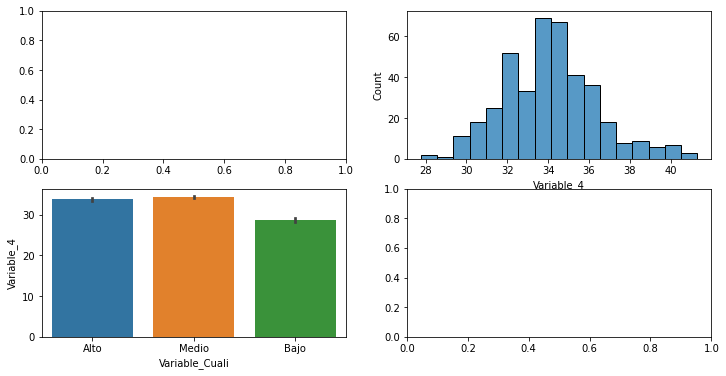

In [32]:
graficos('Variable_4','Variable_Cuali')